# Imported Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset

'market_segmentation.csv' data set contains information about various features('Satisfaction', 'Loyalty') of market.

Satisfaction Contains the satisfaction level of customer and Loyalty Contains the loyalty of Customer.

In [2]:
df = pd.read_csv('market_segmentation.csv')
df

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Cheacking information about total no. of rows and columns, Missing values and the data type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


# Plot Data

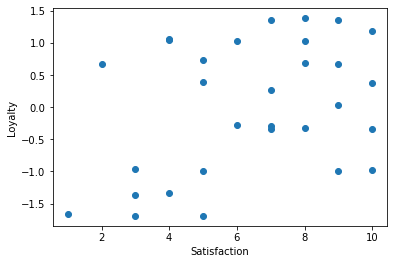

In [4]:
# scatter plot between Satisfaction v/s Loyalty
plt.scatter(df.Satisfaction, df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

# Clustering

In [17]:
# no. of clusters = 4
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Satisfaction', 'Loyalty']])
y_predicted

array([1, 0, 1, 0, 3, 1, 0, 0, 2, 2, 0, 3, 1, 3, 0, 2, 2, 2, 0, 2, 2, 1,
       3, 1, 3, 0, 2, 0, 1, 3])

In [18]:
# clustering results
df['cluster'] = y_predicted
df.head()

,Satisfaction,Loyalty,cluster
0,0.333333,0.117264,1
1,0.555556,0.459283,0
2,0.444444,0.228013,1
3,0.666667,0.456026,0
4,0.333333,0.895765,3


# Cluster Centers

In [19]:
# to check cluster centers
km.cluster_centers_

array([[0.79012346, 0.43358668],
       [0.26984127, 0.10004653],
       [0.84722222, 0.87703583],
       [0.37037037, 0.81758958]])

# Plot the Clustered Data

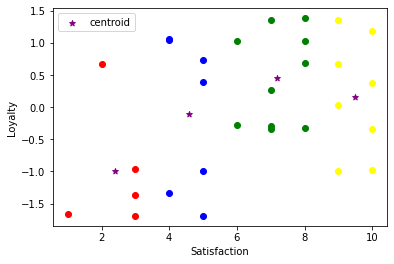

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Satisfaction, df1['Loyalty'], color='green')
plt.scatter(df2.Satisfaction, df2['Loyalty'], color='red')
plt.scatter(df3.Satisfaction, df3['Loyalty'], color='blue')
plt.scatter(df4.Satisfaction, df4['Loyalty'], color='yellow')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.legend()
plt.show()

# Scaling using MinMaxScaler

In [9]:
# we use scaling
# Preprocessing using min max scaler
#min_max scaling convert all the values in the range of 0-1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Loyalty']])
df['Loyalty']= scaler.transform(df[['Loyalty']])

scaler.fit(df[['Satisfaction']])
df['Satisfaction']= scaler.transform(df[['Satisfaction']])
df.head()

,Satisfaction,Loyalty,cluster
0,0.333333,0.117264,2
1,0.555556,0.459283,0
2,0.444444,0.228013,2
3,0.666667,0.456026,0
4,0.333333,0.895765,2


scatter plot between Satisfaction v/s Loyalty

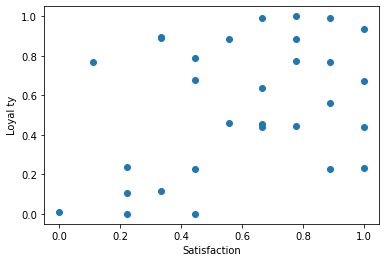

In [10]:
plt.scatter(df.Satisfaction, df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyal ty')
plt.show()

Clustering again after scaling

In [11]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Satisfaction', 'Loyalty']])
y_predicted

array([2, 1, 2, 1, 3, 2, 1, 1, 0, 0, 1, 3, 2, 3, 1, 0, 0, 0, 1, 0, 0, 2,
       3, 2, 3, 1, 0, 1, 2, 3])

Clustering result

In [12]:
df['cluster'] = y_predicted
df.head()

,Satisfaction,Loyalty,cluster
0,0.333333,0.117264,2
1,0.555556,0.459283,1
2,0.444444,0.228013,2
3,0.666667,0.456026,1
4,0.333333,0.895765,3


In [13]:
# to check cluster centers
km.cluster_centers_

array([[0.84722222, 0.87703583],
       [0.79012346, 0.43358668],
       [0.26984127, 0.10004653],
       [0.37037037, 0.81758958]])

Visualizing the clustered data

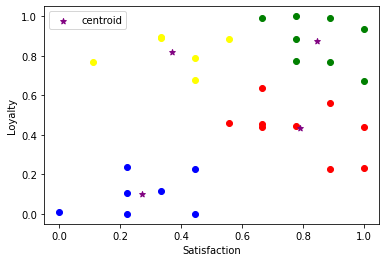

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.Satisfaction, df1['Loyalty'], color='green')
plt.scatter(df2.Satisfaction, df2['Loyalty'], color='red')
plt.scatter(df3.Satisfaction, df3['Loyalty'], color='blue')
plt.scatter(df4.Satisfaction, df4['Loyalty'], color='yellow')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.legend()
plt.show()

# Elbow point

In [15]:
sse=[]
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Satisfaction', 'Loyalty']])
    sse.append(km.inertia_)

# Visualizing the Elbow point

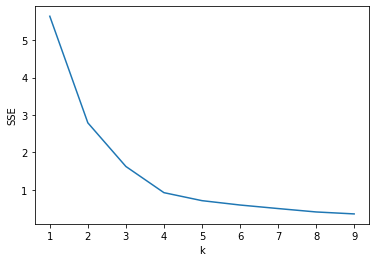

In [16]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng, sse)

plt.show()

# Analysis

Following are the things that can be interpreted from the above scatter plot:

1. Blue points - People who are less satisfied and less loyal

2. Yellow points - People with high loyalty and less satisfaction.

3. Green points - People with high loyalty and high satisfaction

4. Red points - People who are in the midst of things.